# Import Libraries

In [2]:
## Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

## Load the Datasets
When you load the dataset, please make sure the .csv file path, as I run the code on both jupyter notebook and Google Colab, the path might be different 

In [51]:
## Load the Datasets
file1 = "content/index_1.csv"
file2 = "content/index_2.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

print("Shape of index_1.csv:", df1.shape)
print("Shape of index_2.csv:", df2.shape)

Shape of index_1.csv: (3636, 6)
Shape of index_2.csv: (262, 5)


##### Merge the Datasets

In [52]:
## Merge the Datasets
merged_dataset = pd.concat([df1, df2], ignore_index=True)
print("Merged dataset shape:", merged_dataset.shape)

# Save the merged dataset to a new CSV file
merged_dataset.to_csv('content/merged_dataset.csv', index=False)
print("Merged dataset saved as 'merged_dataset.csv'")

Merged dataset shape: (3898, 6)
Merged dataset saved as 'merged_dataset.csv'


##### Save and load the merged dataset (merged_dataset)

In [53]:
#save and load the merged dataset
merged_dataset = "content/merged_dataset.csv"
df12 = pd.read_csv(merged_dataset)
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3898 non-null   object 
 1   datetime     3898 non-null   object 
 2   cash_type    3898 non-null   object 
 3   card         3547 non-null   object 
 4   money        3898 non-null   float64
 5   coffee_name  3898 non-null   object 
dtypes: float64(1), object(5)
memory usage: 182.8+ KB


In [54]:
df12.shape

(3898, 6)

In [55]:
df12.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [56]:
df12.describe().T

,count,mean,std,min,25%,50%,75%,max
money,3898.0,31.3806,5.06461,15.0,27.92,32.82,35.76,40.0


In [57]:
df12.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

# Data Cleaning

In [58]:
#check for missing (null/NaN) values
df12.isnull().sum()

date             0
datetime         0
cash_type        0
card           351
money            0
coffee_name      0
dtype: int64

In [59]:
#check the number of unique values 
df12.nunique()

date            381
datetime       3890
cash_type         2
card           1316
money            27
coffee_name      34
dtype: int64

In [60]:
#update all the coffee name to lower case (avoid duplicate name)
df12['coffee_name'] = df12['coffee_name'].str.lower()

In [61]:
#remove the duplicate entries
duplicated = df12.duplicated()
print(f'Total number of dupliacted value are {len(df12[duplicated])}')
print(f'Total number of dupliacted value are {(df12[duplicated])}')

df12 = df12.drop_duplicates()
print(f'Total number of dupliacted value are {len(df12[duplicated])}')

Total number of dupliacted value are 2
Total number of dupliacted value are             date             datetime cash_type card  money  \
3747  2025-02-26  2025-02-26 09:41:12      cash  NaN   25.0   
3892  2025-03-23  2025-03-23 10:25:48      cash  NaN   25.0   

              coffee_name  
3747  americano with milk  
3892  americano with milk  
Total number of dupliacted value are 0


C:\Users\761608\AppData\Local\Temp\1\ipykernel_28696\2853178950.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f'Total number of dupliacted value are {len(df12[duplicated])}')


In [62]:
# Handling missing values
missing_value = df12[df12['card'].isnull()]
missing_value

,date,datetime,cash_type,card,money,coffee_name
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.0,latte
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.0,latte
41,2024-03-06,2024-03-06 12:30:27.089,cash,NaN,35.0,americano with milk
46,2024-03-07,2024-03-07 10:08:58.945,cash,NaN,40.0,latte
49,2024-03-07,2024-03-07 11:25:43.977,cash,NaN,40.0,latte
...,...,...,...,...,...,...
3893,2025-03-23,2025-03-23 14:55:46,cash,NaN,30.0,cappuccino
3894,2025-03-23,2025-03-23 15:15:36,card,NaN,25.0,irish whiskey
3895,2025-03-23,2025-03-23 17:59:25,card,NaN,28.0,super chocolate
3896,2025-03-23,2025-03-23 18:01:33,card,NaN,28.0,vanilla with irish whiskey


In [63]:
# Dropping the 'card' and 'date' column as it is unnecessary, just keep the 'cash_type' will do, AKA payment method ; 'date' column is duplicate with 'datetime'
df12.drop(columns=['card', 'date'], inplace=True)
df12.columns

Index(['datetime', 'cash_type', 'money', 'coffee_name'], dtype='object')

In [64]:
# Convert datetime column to datetime format
df12['datetime'] = pd.to_datetime(df12['datetime'], format="mixed")
df12[['datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3896 entries, 0 to 3897
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  3896 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 60.9 KB


In [65]:
#rename the cash_type column name to payment method
df12.rename(columns={'cash_type': 'payment_method'}, inplace=True)
df12[['payment_method']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3896 entries, 0 to 3897
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   payment_method  3896 non-null   object
dtypes: object(1)
memory usage: 60.9+ KB


In [66]:
#Create columns for day of week, year, month, day, hour of coffee purchases
df12['day_of_week'] = df12['datetime'].dt.dayofweek
df12['year'] = df12['datetime'].dt.year
df12['month'] = df12['datetime'].dt.month
df12['day'] = df12['datetime'].dt.day
df12['hour'] = df12['datetime'].dt.hour

In [67]:
# map numerical weekday values to their string names
df12['day_of_week'] = df12['day_of_week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

In [68]:
df12[['year', 'month', 'day', 'hour']].describe().T

,count,mean,std,min,25%,50%,75%,max
year,3896.0,2024.308778,0.462049,2024.0,2024.0,2024.0,2025.0,2025.0
month,3896.0,6.132957,3.504449,1.0,3.0,6.0,9.0,12.0
day,3896.0,15.524127,8.547079,1.0,8.0,16.0,22.0,31.0
hour,3896.0,14.206622,4.214976,6.0,11.0,14.0,18.0,23.0


In [69]:
df12

,datetime,payment_method,money,coffee_name,day_of_week,year,month,day,hour
0,2024-03-01 10:15:50.520,card,38.7,latte,Friday,2024,3,1,10
1,2024-03-01 12:19:22.539,card,38.7,hot chocolate,Friday,2024,3,1,12
2,2024-03-01 12:20:18.089,card,38.7,hot chocolate,Friday,2024,3,1,12
3,2024-03-01 13:46:33.006,card,28.9,americano,Friday,2024,3,1,13
4,2024-03-01 13:48:14.626,card,38.7,latte,Friday,2024,3,1,13
...,...,...,...,...,...,...,...,...,...
3893,2025-03-23 14:55:46.000,cash,30.0,cappuccino,Sunday,2025,3,23,14
3894,2025-03-23 15:15:36.000,card,25.0,irish whiskey,Sunday,2025,3,23,15
3895,2025-03-23 17:59:25.000,card,28.0,super chocolate,Sunday,2025,3,23,17
3896,2025-03-23 18:01:33.000,card,28.0,vanilla with irish whiskey,Sunday,2025,3,23,18


##### Save and load the final dataset (cleaned_dataset)

In [70]:
# Save the cleaned dataset to a new CSV file
df12.to_csv("content/cleaned_dataset.csv", index=False)
cleaned_dataset = "content/cleaned_dataset.csv"
df = pd.read_csv(cleaned_dataset)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3896 entries, 0 to 3895
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        3896 non-null   object 
 1   payment_method  3896 non-null   object 
 2   money           3896 non-null   float64
 3   coffee_name     3896 non-null   object 
 4   day_of_week     3896 non-null   object 
 5   year            3896 non-null   int64  
 6   month           3896 non-null   int64  
 7   day             3896 non-null   int64  
 8   hour            3896 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 274.1+ KB


# EDA

In [71]:
# Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime'])

#show the number of coffee type
len(df['coffee_name'].unique())

33

The total number of coffee type is 33.

##### Payment Method

In [72]:
payment_method = df['payment_method'].value_counts()
payment_method

payment_method
card    3729
cash     167
Name: count, dtype: int64

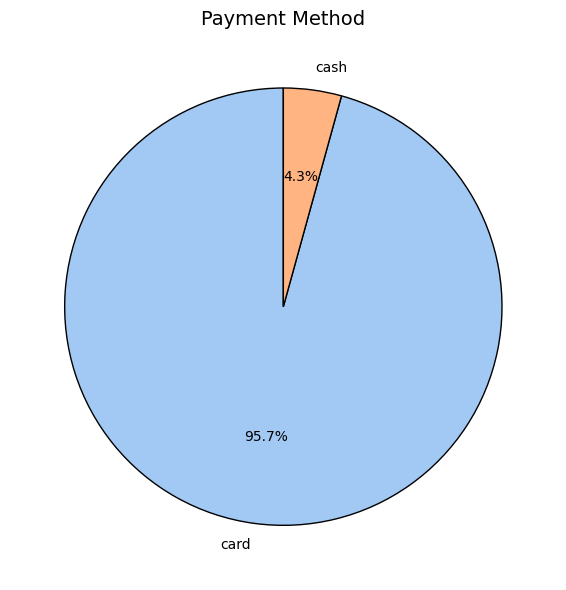

In [73]:
#Visualise the payment method 
colors = sns.color_palette('pastel')[0:len(payment_method)]

plt.figure(figsize=(6,6))
plt.pie(payment_method.values,
        labels=payment_method.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'black'})

plt.title('Payment Method', fontsize=14)
plt.tight_layout()
plt.show()


Based on the pie chart analysis, it is evident that the majority of users prefer to make payments using card rather than cash when purchasing from the coffee vending machine. Specifically, card payments account for 95.7% of all transactions, while cash payments constitute only 4.3%.

##### Hourly Sales

In [74]:
hourly_sales=df['hour'].value_counts().sort_index()
hourly_sales

hour
6       5
7      99
8     246
9     257
10    362
11    316
12    271
13    241
14    245
15    267
16    307
17    267
18    247
19    253
20    177
21    210
22    123
23      3
Name: count, dtype: int64

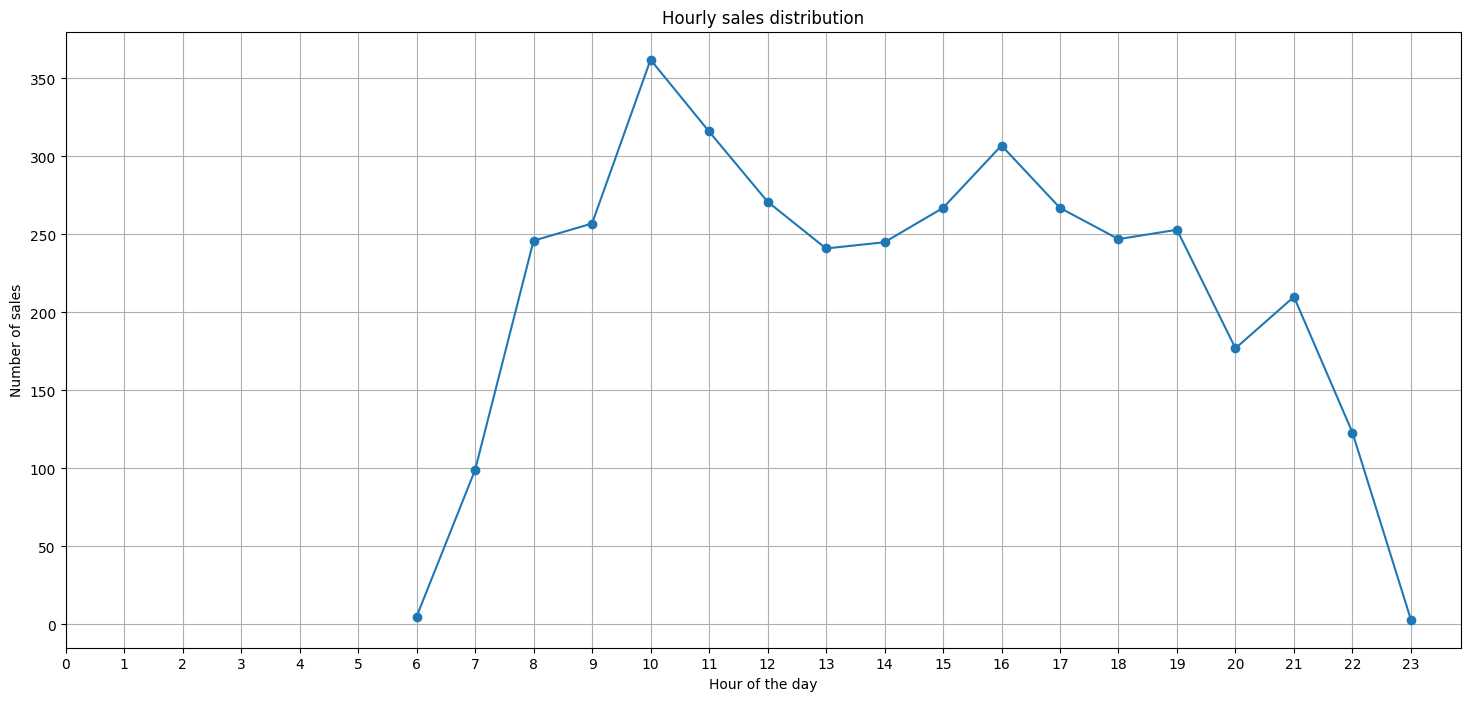

In [75]:
#Visualise the hourly sales
plt.figure(figsize=(18,8))
plt.plot(hourly_sales.index,hourly_sales.values,marker='o')
plt.xticks(range(24))
plt.xlabel('Hour of the day')
plt.ylabel('Number of sales')
plt.title('Hourly sales distribution')
plt.grid(True)
plt.show()

The hourly sales distribution graph illustrates distinct customer purchasing patterns, with peak sales occurring between 8 AM and 10 AM, suggesting high morning demand likely tied to daily routines. A secondary increase is observed around 3 PM to 4 PM, indicating afternoon coffee consumption. Sales remain moderate during midday but drop significantly after 9 PM, with minimal activity from midnight to early morning. These trends provide valuable input for optimizing inventory refill schedules and machine operations, allowing businesses to prioritize restocking during peak hours and reduce idle time during low-demand periods, ultimately enhancing efficiency and customer satisfaction.

##### Number of Orders by Day of the Week

In [76]:
weekday_types = df.groupby('day_of_week').size().reset_index(name = 'count')
weekday_types

,day_of_week,count
0,Friday,586
1,Monday,591
2,Saturday,531
3,Sunday,492
4,Thursday,540
5,Tuesday,604
6,Wednesday,552


C:\Users\761608\AppData\Local\Temp\1\ipykernel_28696\1010898950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=weekday_types, y='day_of_week', x='count', palette='pastel')


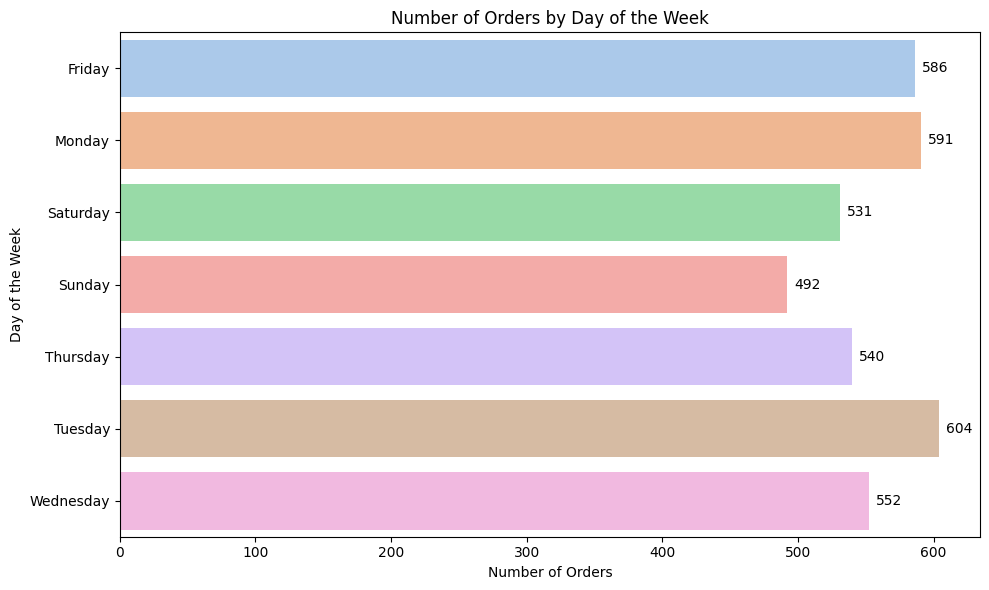

In [77]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=weekday_types, y='day_of_week', x='count', palette='pastel')

plt.title('Number of Orders by Day of the Week')
plt.xlabel('Number of Orders')
plt.ylabel('Day of the Week')

# Add labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()


The bar chart displays the number of coffee orders by day of the week, highlighting customer behavior across the week. Tuesday records the highest number of orders at 604, followed closely by Monday (591) and Friday (586), indicating strong weekday demand. Orders are relatively consistent on Wednesday, Thursday, and Saturday, ranging between 531 and 552. Sunday shows the lowest activity at 492 orders, suggesting reduced consumption during the weekend. This pattern emphasizes the importance of prioritizing inventory refills and machine readiness during the early weekdays to meet higher demand, while slightly scaling down operations toward the end of the week for improved efficiency.

##### Sales by Year-Month

In [78]:
sales_month=df.groupby(['year', 'month'])['money'].sum().reset_index()
sales_month

,year,month,money
0,2024,3,7050.20
1,2024,4,6720.56
2,2024,5,9063.42
3,2024,6,7758.76
4,2024,7,6915.94
5,2024,8,7613.84
6,2024,9,9988.64
7,2024,10,13891.16
8,2024,11,8590.54
9,2024,12,8237.74


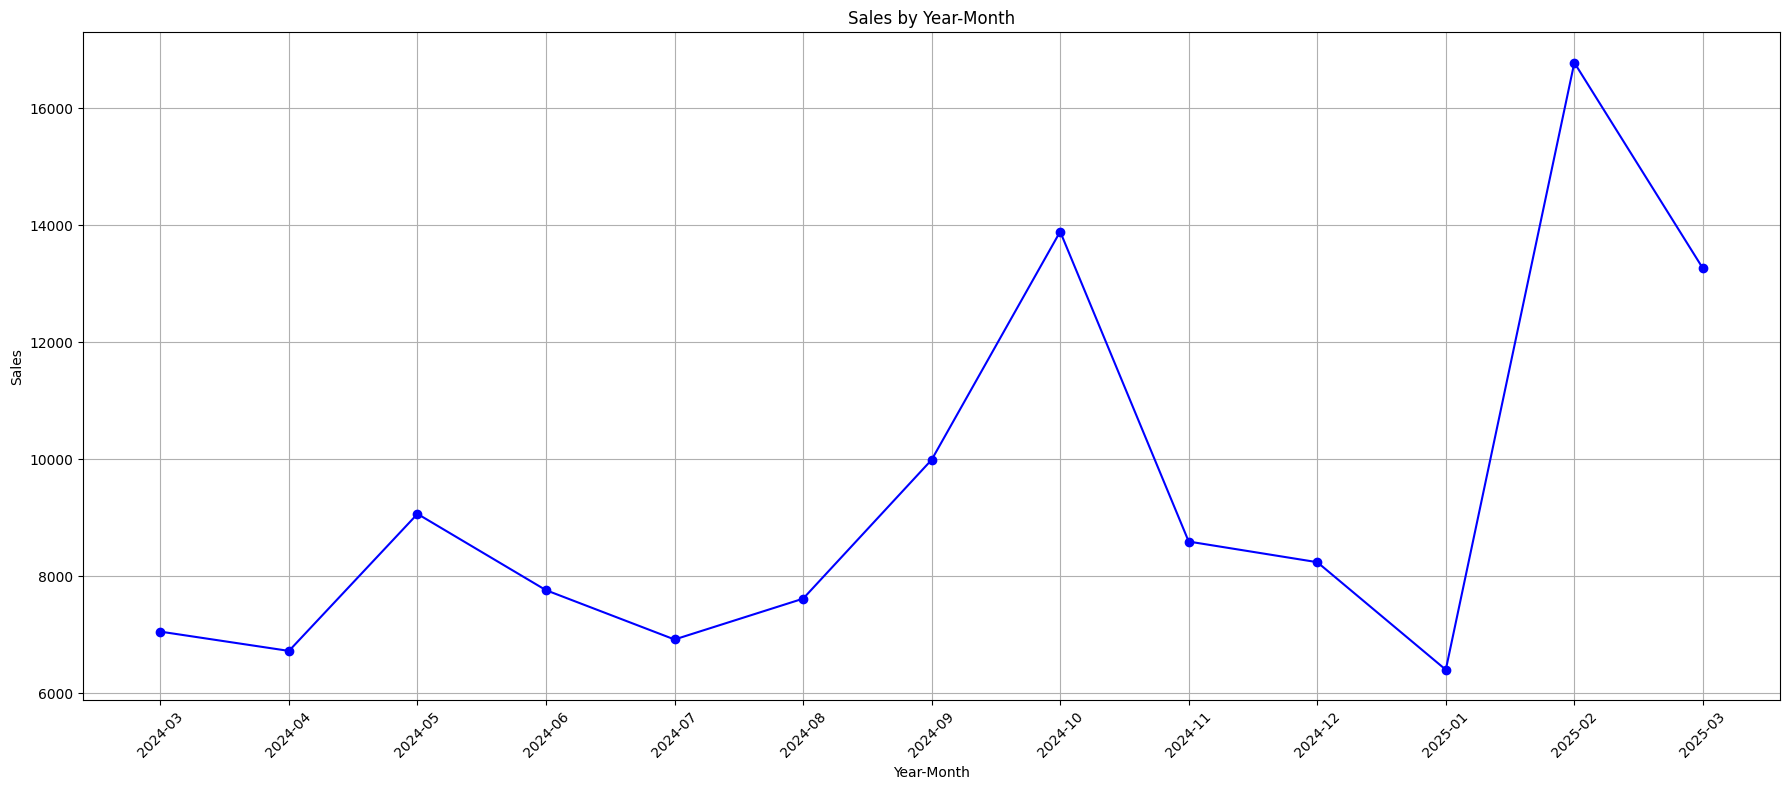

In [79]:
sales_month['year_month'] = sales_month['year'].astype(str) + '-' + sales_month['month'].astype(str).str.zfill(2)

plt.figure(figsize=(18,8))
plt.plot(sales_month['year_month'], sales_month['money'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.title('Sales by Year-Month')
plt.grid(True)
plt.tight_layout()
plt.show()


The line chart displaying sales by year and month highlights clear fluctuations in customer demand over time. From March to July 2024, sales remained relatively stable with slight variations, followed by a noticeable upward trend beginning in August and peaking significantly in October 2024. After a drop during the year-end period (November to January), sales surged dramatically in February 2025, reaching the highest recorded value before slightly declining in March. These patterns may reflect seasonal influences, marketing efforts, or customer behavior changes, and they provide a strong foundation for time series forecasting models. Understanding these trends enables more accurate inventory planning and targeted promotional strategies to maintain consistent sales performance across months.

##### Total sales of the top 9 coffee

In [80]:
coffee_grouping_df = df.groupby('coffee_name')['money'].sum().reset_index()
coffee_grouping_df = coffee_grouping_df.sort_values(by='money', ascending=False)

# Select top 9 entries
top9_df = coffee_grouping_df.head(9)

# Apply styling for max and min
styled_df = top9_df.style.format({
    'money': '${:,.2f}'  # Format as currency with 2 decimal places
}).highlight_max(subset=['money'], color='#4DBB63').highlight_min(subset=['money'], color='lightcoral')

styled_df

,coffee_name,money
27,latte,"$28,658.30"
1,americano with milk,"$26,319.12"
2,cappuccino,"$18,514.14"
0,americano,"$15,437.26"
22,hot chocolate,"$10,172.46"
11,cocoa,"$8,678.16"
14,cortado,"$7,534.86"
21,espresso,"$3,187.28"
24,irish whiskey,$525.00


The table presents the total revenue generated by different coffee types, showcasing only the **top 9** for analysis. It offers valuable insights into customer preferences and product performance. **Latte** ranks as the most profitable item, generating **\$28,658.30**, followed by **Americano with milk** and **Cappuccino**, with earnings of **\$26,319.12** and **\$18,514.14**, respectively. These top-selling options indicate a strong customer preference for milk-based and balanced-flavor beverages. On the lower end, **Irish whiskey** recorded the least revenue at **\$525.00**, suggesting it may be a niche or unpopular choice. These findings can guide inventory prioritization, promotional focus, and menu adjustments to align supply with customer demand and maximize profitability.


In [81]:
# Identify top 9 coffee names by total revenue
top9_names = (
    df.groupby('coffee_name')['money']
    .sum()
    .sort_values(ascending=False)
    .head(9)
    .index.tolist()
)

# Filter the dataset for top 8 coffee names
filtered_df = df[df['coffee_name'].isin(top9_names)][['datetime', 'coffee_name', 'money']].copy()

# Pivot the DataFrame — coffee names as columns
pivot_df = filtered_df.pivot_table(
    index='datetime',
    columns='coffee_name',
    values='money',
    aggfunc='sum'  # In case of multiple entries per datetime
)

# Fill missing values (if any) with 0, and convert to integer or float as needed
pivot_df = pivot_df.fillna(0)

# Sort by datetime
pivot_df = pivot_df.sort_index()

# Save to CSV
pivot_df.to_csv("content/top9_coffee_revenue_by_column.csv")
print("Saved: content/top9_coffee_revenue_by_column.csv")


Saved: content/top9_coffee_revenue_by_column.csv


In [82]:
# Display each table
for name in top9_names:
    coffee_df = df[df['coffee_name'] == name][['datetime', 'money']]
    print(f"\n=== {name.upper()} ===")
    print(coffee_df)


=== LATTE ===
                    datetime  money
0    2024-03-01 10:15:50.520   38.7
4    2024-03-01 13:48:14.626   38.7
12   2024-03-02 10:30:35.668   40.0
18   2024-03-03 10:10:43.981   40.0
19   2024-03-03 10:27:18.561   38.7
...                      ...    ...
3839 2025-03-14 15:59:44.000   33.0
3850 2025-03-15 21:02:14.000   33.0
3858 2025-03-17 16:44:56.000   33.0
3870 2025-03-19 17:44:09.000   33.0
3873 2025-03-20 11:54:23.000   33.0

[806 rows x 2 columns]

=== AMERICANO WITH MILK ===
                    datetime  money
5    2024-03-01 15:39:47.726   33.8
7    2024-03-01 18:39:03.580   33.8
9    2024-03-01 19:23:15.887   33.8
10   2024-03-01 19:29:17.391   33.8
13   2024-03-02 10:41:41.249   33.8
...                      ...    ...
3854 2025-03-16 15:04:02.000   25.0
3878 2025-03-21 21:47:03.000   25.0
3886 2025-03-22 22:19:59.000   25.0
3887 2025-03-22 22:21:21.000   25.0
3890 2025-03-23 10:25:48.000   25.0

[866 rows x 2 columns]

=== CAPPUCCINO ===
                    date

##### The top 8 of the coffee order

In [83]:
coffee_order_counts = df.groupby('coffee_name').size().reset_index(name='num_orders').sort_values(by='num_orders', ascending=False).head(8)
coffee_order_counts

,coffee_name,num_orders
1,americano with milk,866
27,latte,806
0,americano,593
2,cappuccino,517
14,cortado,292
22,hot chocolate,282
11,cocoa,243
21,espresso,152


The table shows the **top 8** number of orders placed for each coffee type, providing a clear view of customer preferences in terms of frequency. **Americano with milk** leads with **866 orders**, followed by **Latte** at **806 orders**, and **Americano** with **593 orders**. These results align closely with the revenue rankings, reinforcing their popularity. Notably, **Cappuccino** and **Cortado** also maintain strong positions, while **Espresso** ranks the lowest with only **152 orders**, indicating it is less favored among customers. This ordering trend highlights which products should be prioritized in stock and promotions, helping to ensure availability and boost overall customer satisfaction.


In [84]:
# Find top 8 coffee names by number of orders
top8_names = (
    df.groupby('coffee_name')
    .size()
    .sort_values(ascending=False)
    .head(8)
    .index
    .tolist()
)

# Filtered the top 8 of the 
filtered_df = df[df['coffee_name'].isin(top8_names)]

# Group by coffee_name and datetime, then count orders
grouped_orders = (
    filtered_df.groupby(['datetime', 'coffee_name'])
    .size()
    .reset_index(name='num_orders')
)

# Pivot: coffee types as columns, datetime as index
pivot_table = grouped_orders.pivot_table(
    index='datetime',
    columns='coffee_name',
    values='num_orders',
    fill_value=0  # Fill missing entries with 0
)

# Save to CSV
pivot_table.to_csv("content/top8_coffee_orders_by_column.csv")
print("Saved: top8_coffee_orders_by_column.csv")

Saved: top8_coffee_orders_by_column.csv


In [85]:
# Group by coffee_name and datetime to count number of orders
grouped_orders = (
    filtered_df.groupby(['coffee_name', 'datetime'])
    .size()
    .reset_index(name='num_orders')
    .sort_values(by=['coffee_name', 'datetime'])
)

#Display the results per coffee name
for coffee in top8_names:
    print(f"\n=== {coffee.upper()} ===")
    #print(grouped_orders[grouped_orders['coffee_name'] == coffee])

    coffee_table = grouped_orders[grouped_orders['coffee_name'] == coffee][['datetime', 'num_orders']]
    print(coffee_table)


=== AMERICANO WITH MILK ===
                    datetime  num_orders
593  2024-03-01 15:39:47.726           1
594  2024-03-01 18:39:03.580           1
595  2024-03-01 19:23:15.887           1
596  2024-03-01 19:29:17.391           1
597  2024-03-02 10:41:41.249           1
...                      ...         ...
1454 2025-03-22 17:53:35.942           1
1455 2025-03-22 19:16:52.727           1
1456 2025-03-22 22:19:59.000           1
1457 2025-03-22 22:21:21.000           1
1458 2025-03-23 10:25:48.000           1

[866 rows x 2 columns]

=== LATTE ===
                    datetime  num_orders
2945 2024-03-01 10:15:50.520           1
2946 2024-03-01 13:48:14.626           1
2947 2024-03-02 10:30:35.668           1
2948 2024-03-03 10:10:43.981           1
2949 2024-03-03 10:27:18.561           1
...                      ...         ...
3746 2025-03-21 17:22:49.875           1
3747 2025-03-21 18:52:12.666           1
3748 2025-03-22 16:26:59.766           1
3749 2025-03-23 10:07:11.278  

C:\Users\761608\AppData\Local\Temp\1\ipykernel_28696\3224831956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top8_orders, x='coffee_name', y='num_orders', palette='pastel')


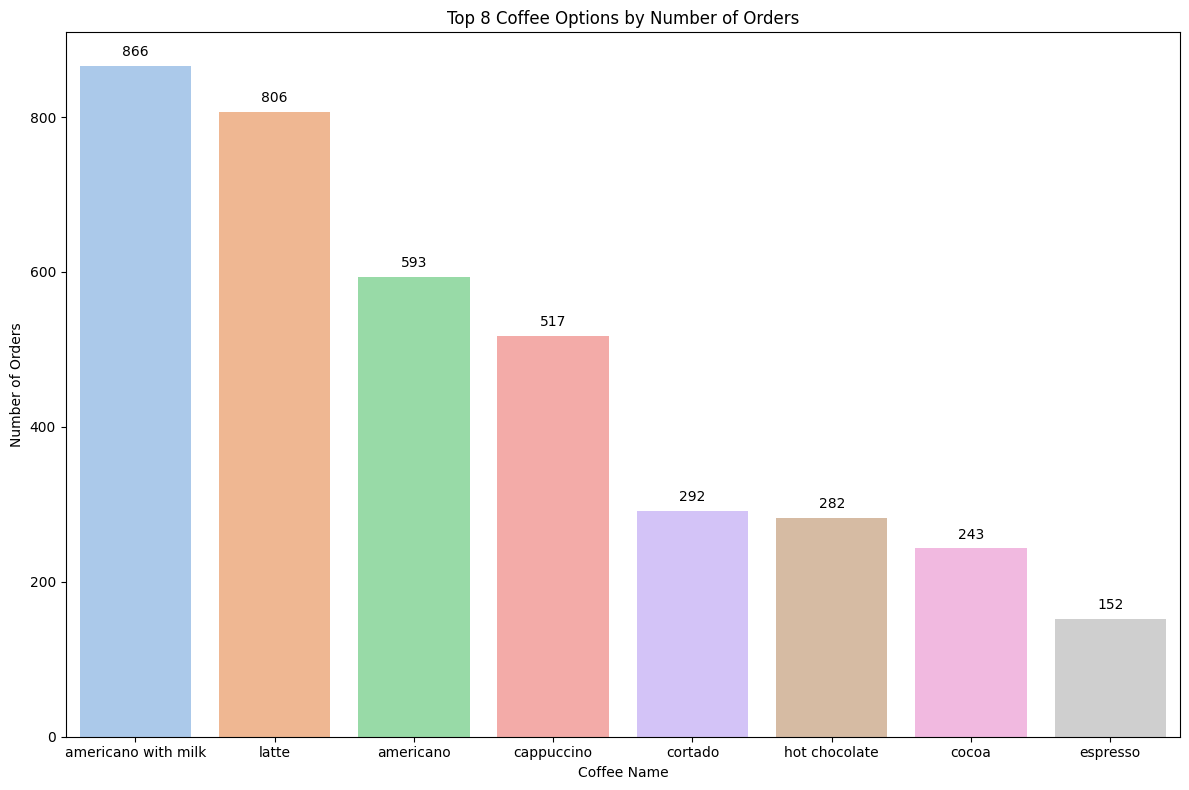

In [86]:
# Top 8 coffee (number of order for 100 and above)
top8_orders = df.groupby('coffee_name').size().reset_index(name='num_orders').sort_values(by='num_orders', ascending=False).head(8)

# Plot
plt.figure(figsize=(12,8))
ax = sns.barplot(data=top8_orders, x='coffee_name', y='num_orders', palette='pastel')

plt.title('Top 8 Coffee Options by Number of Orders')
plt.ylabel('Number of Orders')
plt.xlabel('Coffee Name')
plt.xticks(rotation=0, ha='center')  # Rotate labels for readability

# Add labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()



The bar chart illustrates the top 8 coffee options based on the number of orders, providing a clear overview of customer preferences. **Americano with milk** leads the chart with **866 orders**, followed closely by **Latte** at **806 orders**, indicating that milk-based beverages are the most favored choices among customers. **Americano** and **Cappuccino** also show strong performance, with **593** and **517** orders, respectively. Meanwhile, beverages like **Cortado**, **Hot Chocolate**, **Cocoa**, and **Espresso** received comparatively fewer orders, with **Espresso** ranking the lowest at **152 orders**. This ordering trend emphasizes the need to prioritize high-demand drinks for inventory and marketing while reevaluating the role of lower-demand items on the menu.


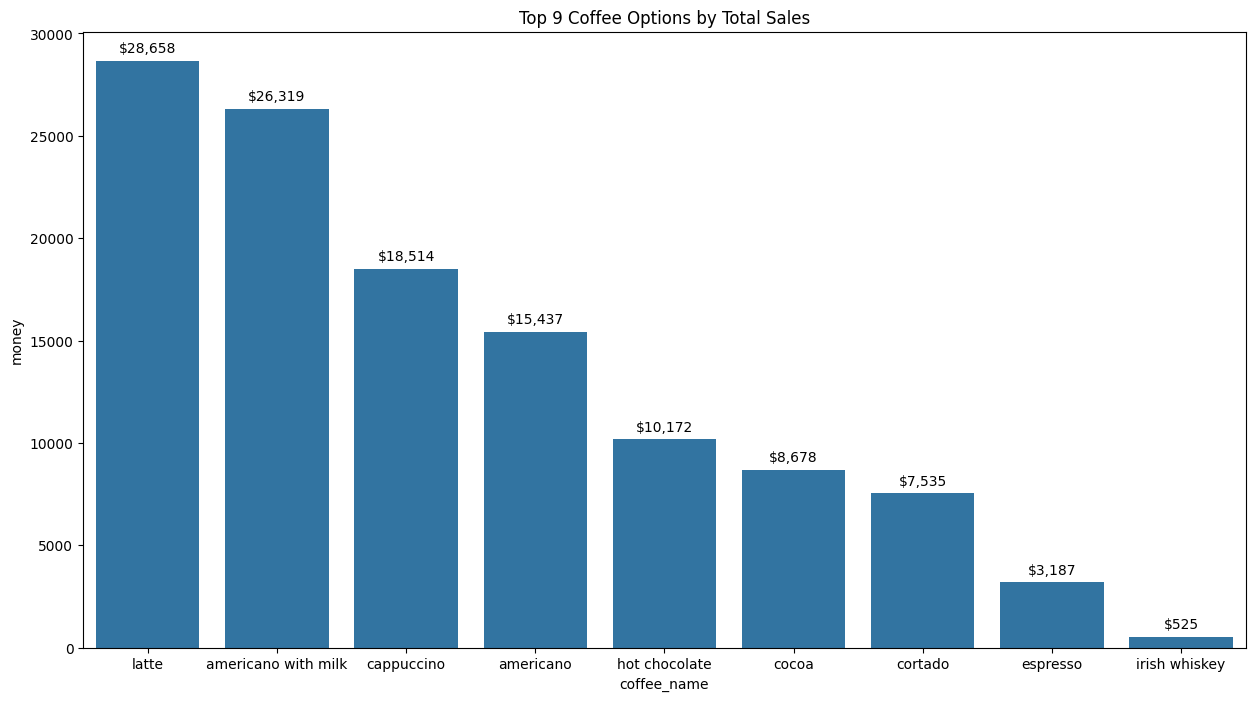

In [87]:
# Create bar chart
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=coffee_grouping_df.nlargest(9, 'money'),
        x='coffee_name',
        y='money')

plt.title('Top 9 Coffee Options by Total Sales')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')
plt.show()


The bar chart displays the top nine coffee options ranked by total sales, offering a clear picture of product profitability. **Latte** leads in revenue, generating **\$28,658**, followed closely by **Americano with milk** at **\$26,319** and **Cappuccino** at **\$18,514**. These figures highlight a strong preference for premium and milk-based beverages among customers. Meanwhile, **Americano** and **Hot Chocolate** also perform well, while lower-tier items like **Espresso** and **Irish Whiskey**, earning only **\$3,187** and **\$525** respectively, indicate limited demand. These insights can inform strategic decisions regarding inventory planning, promotional focus, and menu optimization to maximize revenue and meet customer preferences.


##### Daily Sales for the Year

In [88]:
daily_sales = df.groupby(df['datetime'].dt.date)['money'].sum()
monthly_sales = df.groupby(df['datetime'].dt.month)['money'].sum().reset_index()
hourly_sales = df.groupby(df['datetime'].dt.hour)['money'].sum().reset_index()

In [89]:
# Map month numbers to month names
monthly_sales['datetime'] = monthly_sales['datetime'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                                               5: 'May', 6: 'June', 7: 'July', 8: 'August',
                                               9: 'September', 10: 'October', 11: 'November', 12: 'December'})

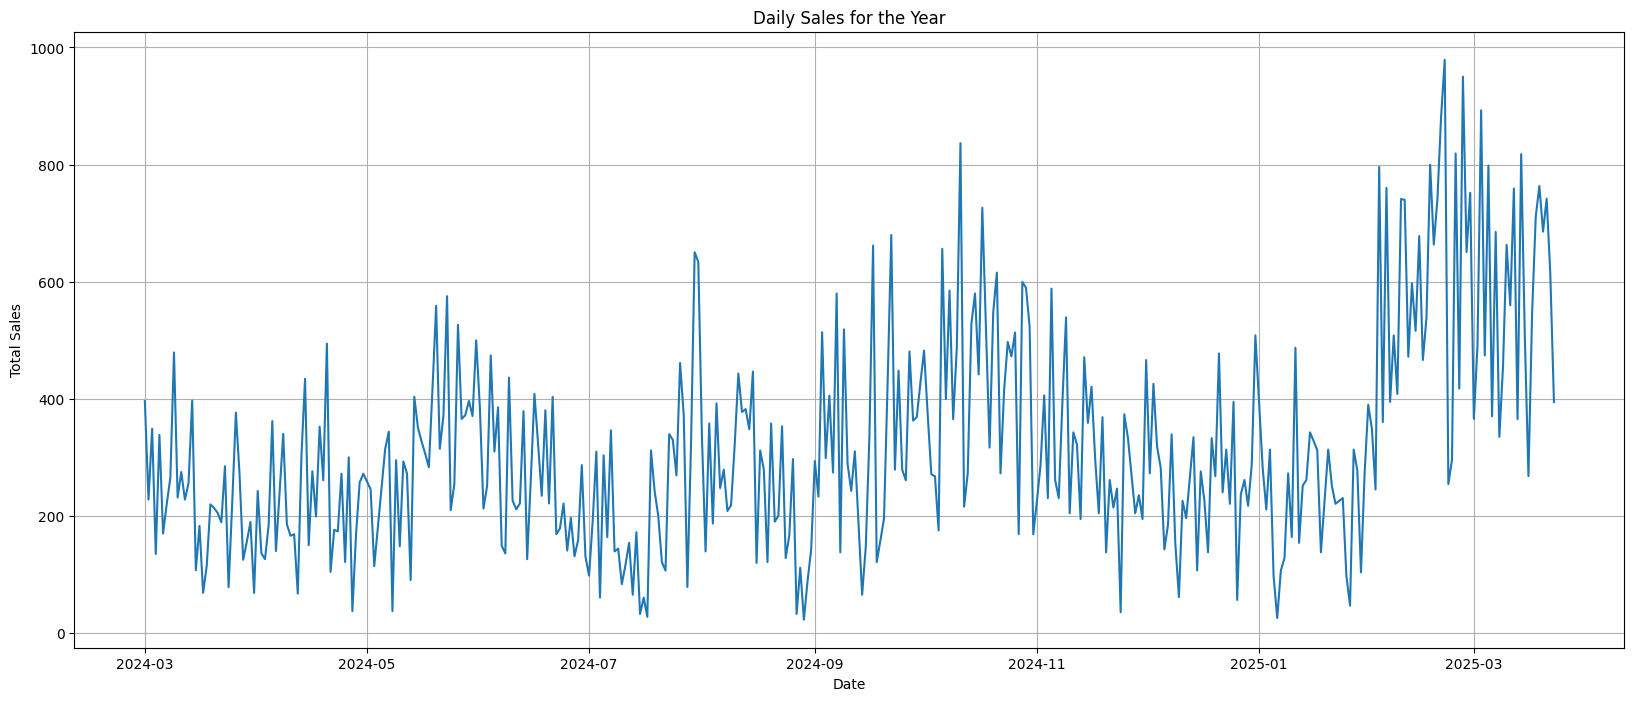

In [90]:
#Plot timeseries, by month, by hour in a day
plt.figure(figsize=(20, 8))
daily_sales.plot(kind='line')
plt.title('Daily Sales for the Year')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

The trend in daily sales over a year is plotted through the line chart to capture short-run fluctuations and long-run patterns in customers' purchasing habits. Sales are extremely volatile throughout, with numerous sharp peaks and troughs. There is an upward trend in sales from the late months of 2024 to a peak surge in early 2025, where daily sales frequently reach or exceed 800 units. This upswing may be a result of heightened consumer activity, seasonality, or effective advertisement campaigns. Greater consistency and sales volume during the early part of 2025 can signal room for growing inventory and improved forecasting of demand, and aiding in strategic planning for vending business companies and supply chain optimization.

##### Total Sales of Coffee per Month

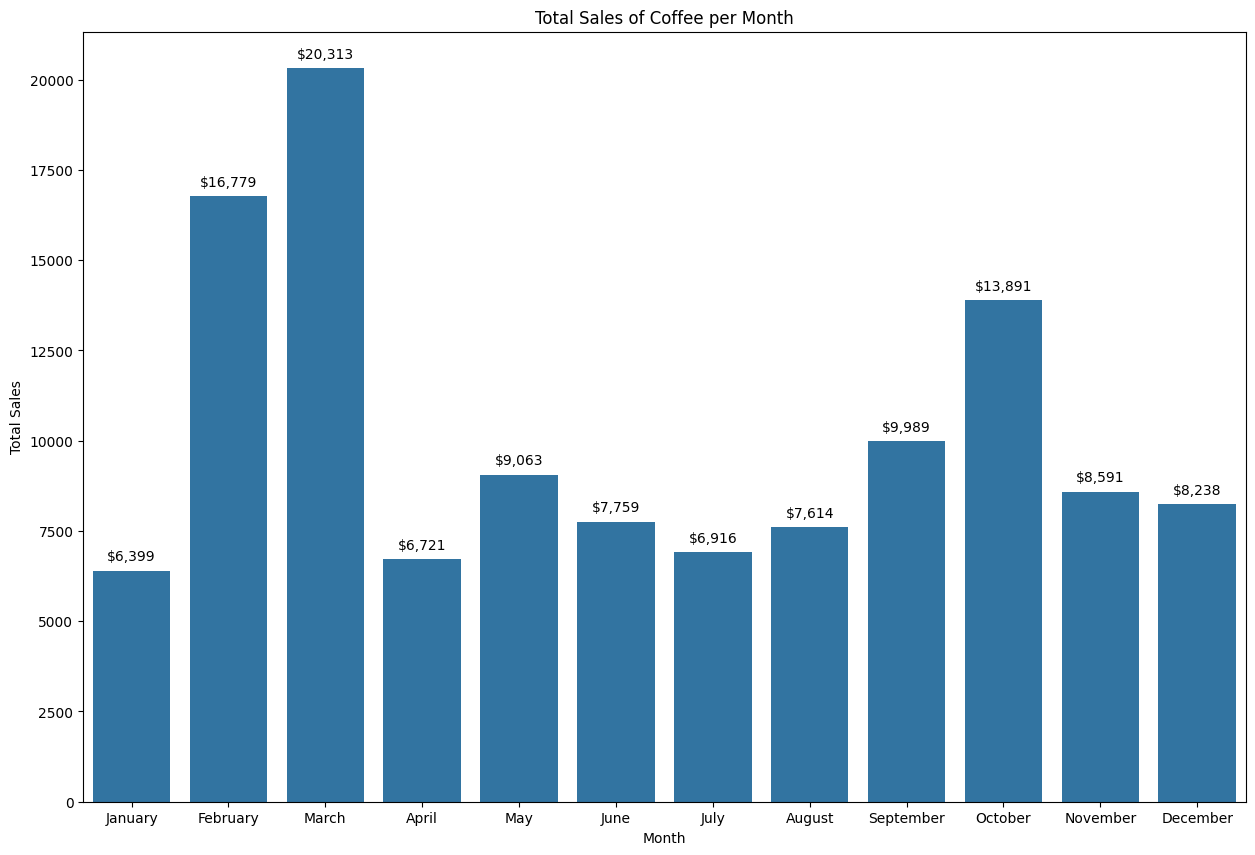

In [91]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(data=monthly_sales,
        x='datetime',
        y='money')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales of Coffee per Month')
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

The bar chart displays total monthly coffee sales, revealing clear seasonal trends in customer demand. **March** recorded the highest sales at **\$20,313**, followed closely by **February** with **\$16,779**. This early-year spike might be linked to the start of a new semester activity, cooler weather, or perhaps well-timed promotional efforts. **October** also stands out with **\$13,891**, suggesting another peak period later in the year. On the flip side, months like **January**, **April**, and **July** saw the lowest sales, with figures around **\$6,400–\$6,900**, reflecting periods of relatively lower customer engagement. These monthly insights are valuable for forecasting and planning, helping to align inventory and marketing strategies with periods of high demand to maximize sales efficiency.


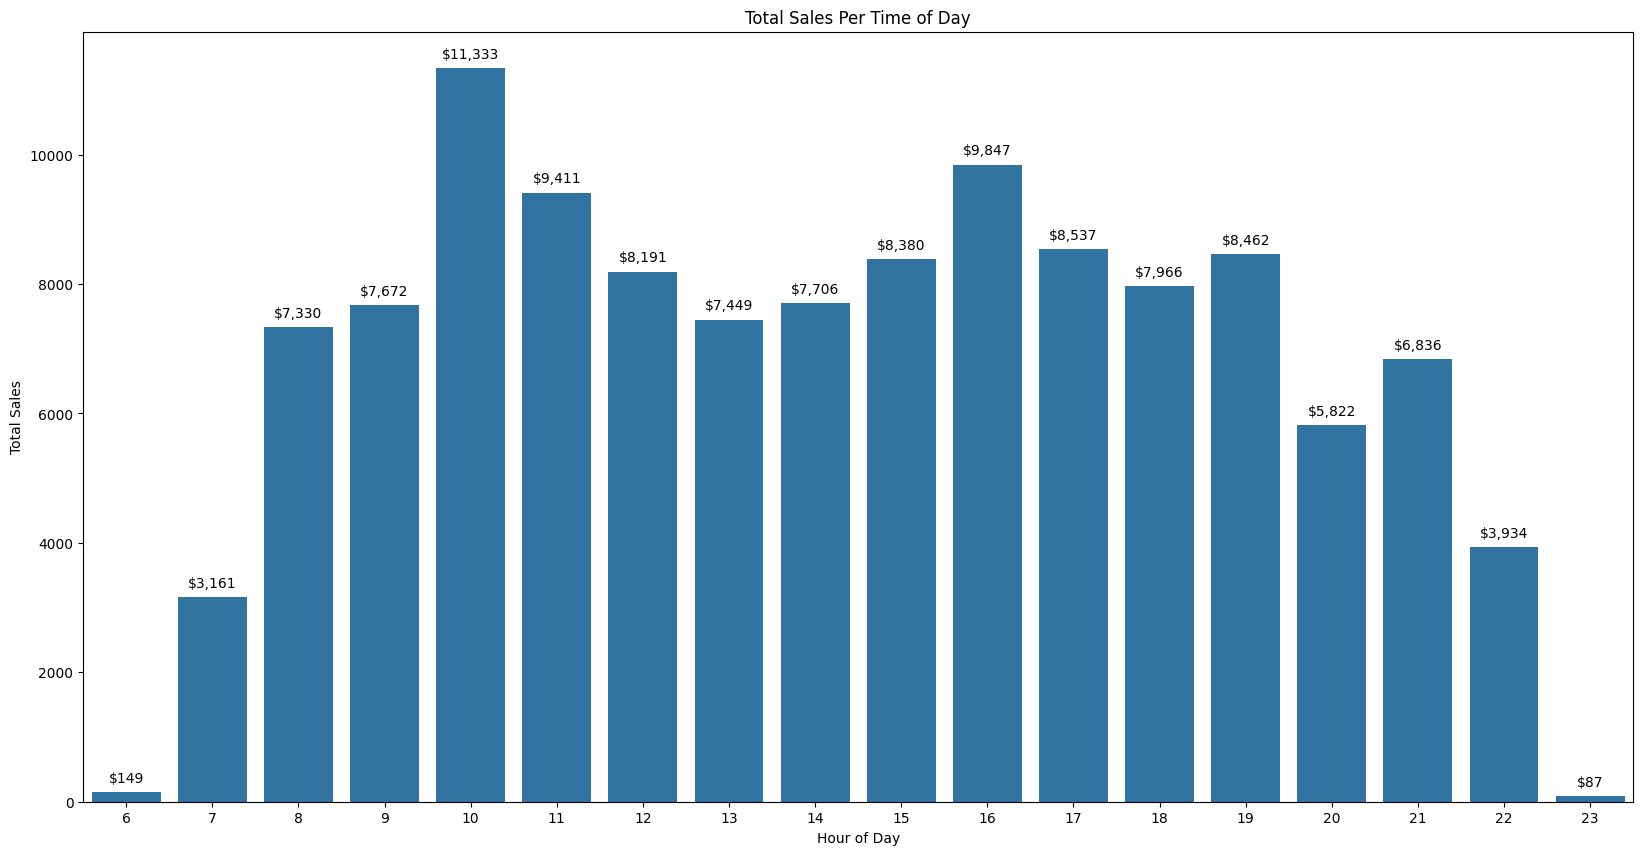

In [92]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=hourly_sales,
        x='datetime',
        y='money')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.title('Total Sales Per Time of Day')
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

The bar chart shows how total coffee sales vary across different hours of the day, highlighting clear customer behavior patterns. Sales start to rise sharply from 7 AM and peak at **10 AM** with a total of **\$11,333**, reflecting the strong morning demand as people begin their day. A second noticeable surge occurs around **4 PM**, reaching **\$9,847**, likely tied to afternoon energy boosts or breaks. Between these peaks, sales remain consistently high throughout midday, indicating steady traffic during lunch hours. However, sales start to taper off after **7 PM**, with a steep drop after **9 PM**, and minimal activity by **11 PM**. These insights suggest that the coffee vending machine is most active during typical work and study hours, which can help inform more efficient inventory refills and promotional timings.


#### Time Series Analysis

##### Smoothing Techniques

In [93]:
# Group by datetime and count number of orders per day
df_sales = df.groupby('datetime').size().reset_index(name='num_orders')

# Set datetime as index and resample to daily frequency
df_sales = df_sales.set_index('datetime').resample('D').sum()

# Display first few rows
df_sales.head()


,num_orders
datetime,
2024-03-01,11
2024-03-02,7
2024-03-03,10
2024-03-04,4
2024-03-05,9


In [94]:
# Simple Moving Average (window=7)
df_sales['SMA_7'] = df_sales['num_orders'].rolling(window=7).mean()

# Exponential Moving Average (alpha=0.3)
df_sales['EMA_0.3'] = df_sales['num_orders'].ewm(alpha=0.3).mean()

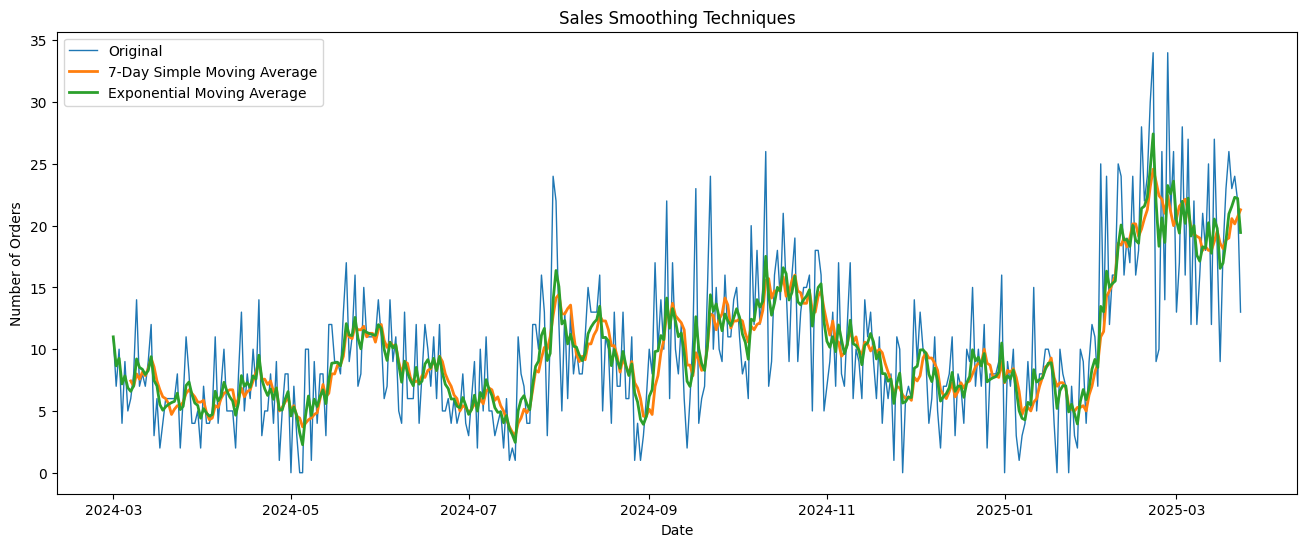

In [95]:
plt.figure(figsize=(16, 6))
plt.plot(df_sales['num_orders'], label='Original', linewidth=1)
plt.plot(df_sales['SMA_7'], label='7-Day Simple Moving Average', linewidth=2)
plt.plot(df_sales['EMA_0.3'], label='Exponential Moving Average', linewidth=2)
plt.title('Sales Smoothing Techniques')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

The chart illustrates the application of smoothing techniques to daily coffee sales data to better identify underlying trends. The blue line represents the original daily sales, which shows high variability with frequent spikes and dips. To reduce this noise and highlight general patterns, two smoothing techniques were applied: the 7-day Simple Moving Average (orange line) and the Exponential Moving Average (green line). Both methods successfully reveal more stable trends over time, with the exponential average reacting slightly faster to recent changes. This smoothed view makes it easier to observe seasonal growth, such as the steady increase in sales in early 2025, and is particularly useful for forecasting, inventory planning, and detecting any abnormal changes in demand.

##### Anomaly Detection

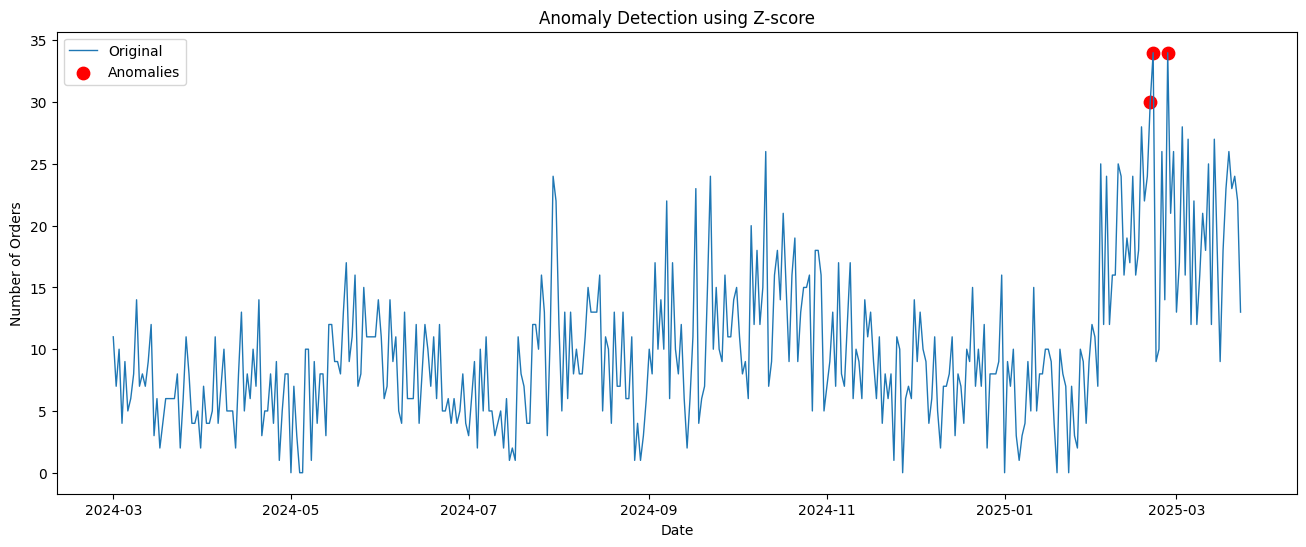

In [ ]:
from scipy.stats import zscore

df_sales['z_score'] = zscore(df_sales['num_orders'].fillna(0))

# Define anomaly threshold (usually > 3 or < -3)
anomaly_threshold = 3
df_sales['anomaly'] = df_sales['z_score'].apply(lambda x: 1 if abs(x) > anomaly_threshold else 0)

# Plot anomalies
plt.figure(figsize=(16, 6))
plt.plot(df_sales['num_orders'], label='Original', linewidth=1)
plt.scatter(df_sales[df_sales['anomaly'] == 1].index, df_sales[df_sales['anomaly'] == 1]['num_orders'],
            color='red', label='Anomalies', s=80)
plt.title('Anomaly Detection using Z-score')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

The chart demonstrates anomaly detection on daily coffee orders using the Z-score method. The blue line represents the original time series, showing regular fluctuations in daily orders throughout the year. Toward early 2025, a sharp increase in sales is observed, and the red dots highlight specific data points that are statistically significant outliers. These anomalies occur when daily order volumes spike well above the normal range, likely driven by exceptional events such as promotions, campus activities, or system errors. Identifying these anomalies is crucial for businesses, as it helps distinguish between natural demand growth and irregular spikes that may require separate operational responses or further investigation.

##### Seasonal Decomposition

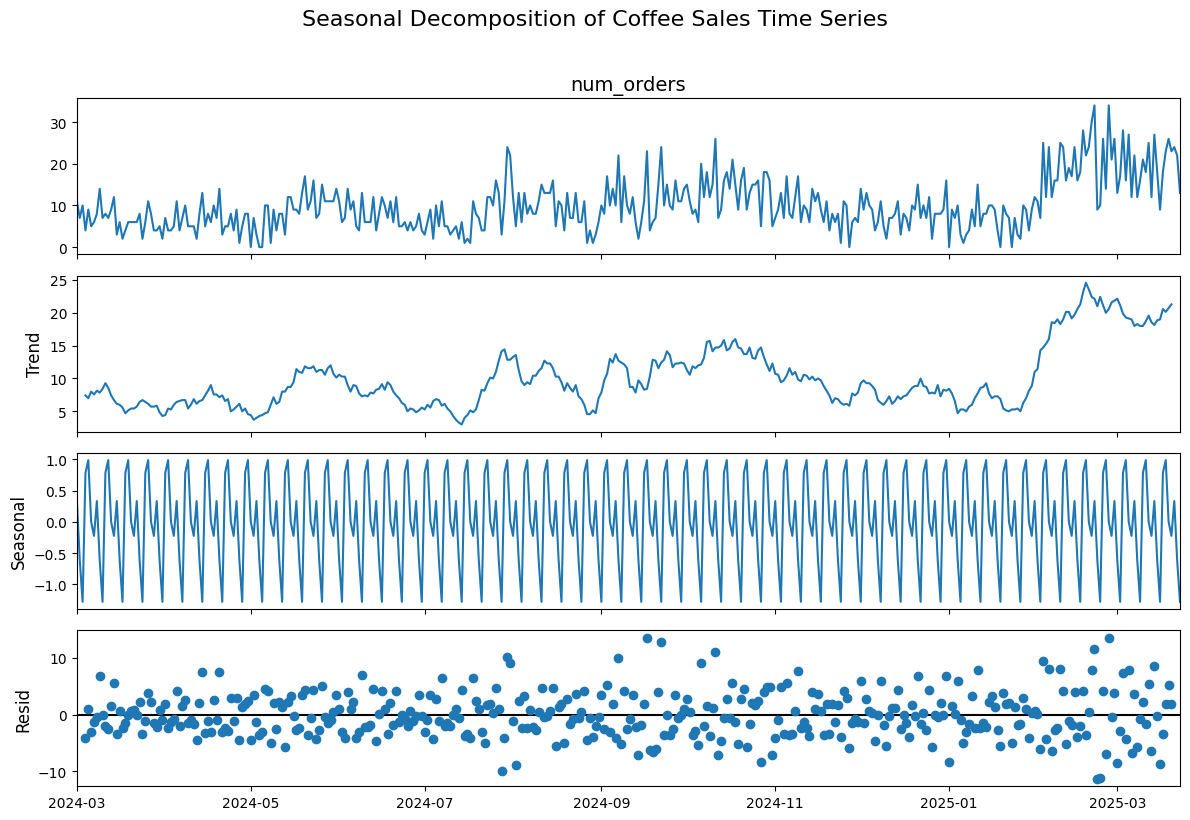

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose with model='additive' or 'multiplicative' based on trend
result = seasonal_decompose(df_sales['num_orders'].fillna(0), model='additive', period=7)

# Get the figure
fig = result.plot()

# Adjust figure size
fig.set_size_inches(12, 8)

# Set the suptitle (main title) — adjust font size and position
fig.suptitle('Seasonal Decomposition of Coffee Sales Time Series', fontsize=16, y=1.02)

# Adjust sub-plot font sizes (optional)
for ax in fig.axes:
    ax.title.set_fontsize(14)
    ax.xaxis.label.set_fontsize(12)
    ax.yaxis.label.set_fontsize(12)
    ax.tick_params(axis='both', labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()



This chart shows the seasonal decomposition of the coffee sales time series, breaking the data into four key components:
1. Observed (Top Panel – num_orders): This is the original time series, reflecting daily coffee orders. It shows variability with a noticeable increase in order volume toward early 2025.
2. Trend (Second Panel): The trend component smooths out short-term fluctuations and reveals a long-term upward movement, especially from early 2025 onwards. This suggests a growing demand for coffee over the year.
3. Seasonal (Third Panel): This component shows a clear and repeating weekly pattern (periodicity), indicating consistent behavior across the same days each week—such as higher orders on weekdays and lower on weekends. The pattern is quite stable, supporting strong seasonality in customer purchasing behavior.
4. Residual (Bottom Panel – Resid): This captures irregularities or noise in the data after removing trend and seasonality. While most values hover around zero, some outliers are still visible, which may point to unusual spikes or drops in sales due to special events or data anomalies.

In summary, this decomposition confirms that coffee sales exhibit a clear seasonal pattern and upward trend, with some irregularities captured in the residuals. These insights are useful for building accurate forecasting models and planning resource allocation.

#### Seasonal Pattern Analysis

##### Monthly Distribution of Coffee Orders

C:\Users\761608\AppData\Local\Temp\1\ipykernel_28696\3741360552.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_order = pd.date_range("2000-01-01", periods=12, freq='M').strftime('%B')


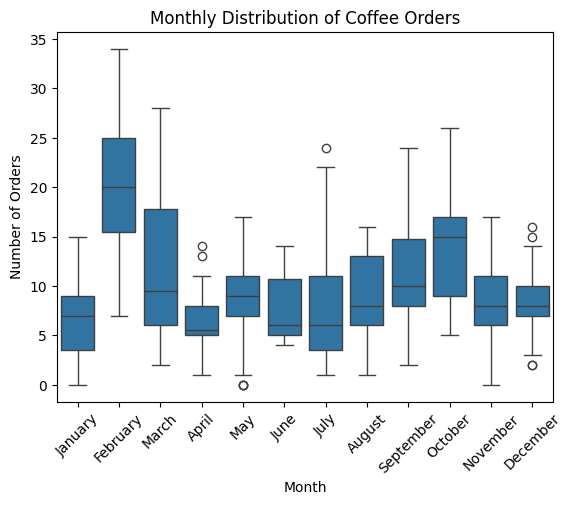

In [98]:
# Make a copy of df_sales with index reset
df_monthly = df_sales.reset_index().copy()

# Add month name column
df_monthly['Month'] = df_monthly['datetime'].dt.month_name()

# Optional: ensure months are ordered correctly
month_order = pd.date_range("2000-01-01", periods=12, freq='M').strftime('%B')

sns.boxplot(data=df_monthly, x='Month', y='num_orders', order=month_order)
plt.xticks(rotation=45)
plt.title("Monthly Distribution of Coffee Orders")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()


The boxplot provides a monthly breakdown of coffee order distributions, offering a clear view of how customer demand varies across the year. **February** stands out with the highest median and a wide spread, indicating consistently strong and variable sales. **March** and **October** also show high variability and relatively strong medians, suggesting increased customer activity during these months. In contrast, **April**, **May**, and **June** show more compact distributions with lower medians, pointing to quieter sales periods. Outliers are visible in several months, especially February, March, and July where a few days had unusually high order volumes. This chart is useful for identifying both stable and volatile months, helping businesses better plan stock levels and tailor promotions to capitalize on peak periods or boost engagement during slower months.


# Final Dataset Export

In [5]:
cleaned_dataset = "Dataset/cleaned_dataset.csv"
df = pd.read_csv(cleaned_dataset)

In [11]:
# Convert 'datetime' column to pandas datetime if not already
df['datetime'] = pd.to_datetime(df['datetime'])

# Aggregate to daily data: sum of 'money' per day
daily_coffee_sales = df.groupby(df['datetime'].dt.date)['money'].sum().reset_index()
daily_coffee_sales.rename(columns={'datetime': 'date', 'money': 'total_sales'}, inplace=True)
daily_coffee_sales.head()

,date,total_sales
0,2024-03-01,396.3
1,2024-03-02,228.1
2,2024-03-03,349.1
3,2024-03-04,135.2
4,2024-03-05,338.5


In [ ]:
daily_coffee_count = df.groupby(df['datetime'].dt.date).size().reset_index(name='order_count')
daily_coffee_count.rename(columns={'datetime': 'date'}, inplace=True)
daily_coffee_count.head()

,date,order_count
0,2024-03-01,11
1,2024-03-02,7
2,2024-03-03,10
3,2024-03-04,4
4,2024-03-05,9


In [12]:
daily_coffee_count.to_csv("Dataset/daily_coffee_count.csv", index=False)
daily_data_sales.to_csv("Dataset/daily_coffee_sales.csv", index=False)